In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# https://www.kaggle.com/camnugent/california-housing-prices

In [4]:
df = pd.read_csv("housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
 X,Y = df[['longitude', 'latitude']].values.T

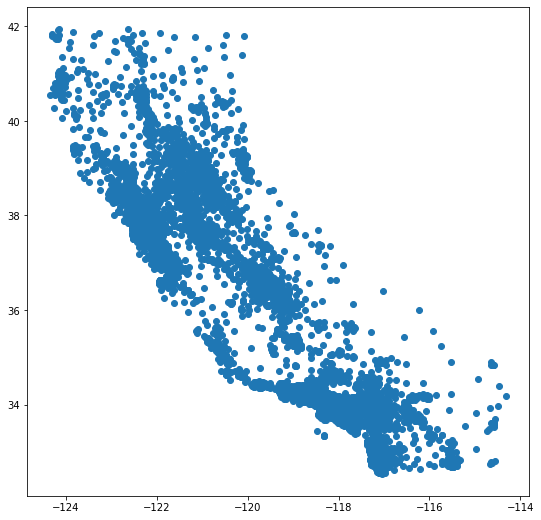

In [6]:
plt.figure(figsize=(9,9))
plt.scatter(X,Y)
plt.show()

In [7]:
k = 2
a = np.linspace(0, np.pi/2, 100)
x = np.cos(a)
y1 = 1 - x
y2 = np.power(1 - x*x, 1./2)
y4 = np.power(1 - x*x*x*x, 1./4)


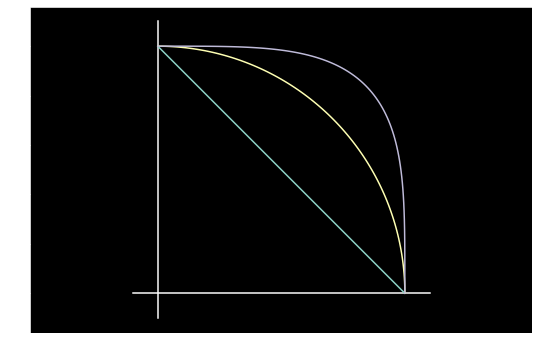

In [8]:
plt.figure(figsize=(9,6))
plt.style.use('dark_background')
plt.axis('equal')

plt.plot([0, 0], [-0.1, 1.1], 'w')
plt.plot([-0.1, 1.1], [0, 0], 'w')

plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y4)

plt.show()

In [9]:
# Normalization

In [95]:
query = np.array([-118.5158609, 34.0218555, 
                  20,
                 3000,
                 1500,
                 1000,
                 500,
                 8,
                 360000])

In [96]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [124]:
data = df.drop('ocean_proximity', 1).dropna().values
data

array([[-1.2223e+02,  3.7880e+01,  4.1000e+01, ...,  1.2600e+02,
         8.3252e+00,  4.5260e+05],
       [-1.2222e+02,  3.7860e+01,  2.1000e+01, ...,  1.1380e+03,
         8.3014e+00,  3.5850e+05],
       [-1.2224e+02,  3.7850e+01,  5.2000e+01, ...,  1.7700e+02,
         7.2574e+00,  3.5210e+05],
       ...,
       [-1.2122e+02,  3.9430e+01,  1.7000e+01, ...,  4.3300e+02,
         1.7000e+00,  9.2300e+04],
       [-1.2132e+02,  3.9430e+01,  1.8000e+01, ...,  3.4900e+02,
         1.8672e+00,  8.4700e+04],
       [-1.2124e+02,  3.9370e+01,  1.6000e+01, ...,  5.3000e+02,
         2.3886e+00,  8.9400e+04]])

In [134]:
def custom_norm(v):
    a = np.array([1e4, 1e4, 0.1, 1e-3, 1e-3, 1e-2, 1e-2, 1, 1e-3])
    return np.abs(v).dot(a) / a[0]

In [135]:
(np.abs(data[0])*np.ones(9)).sum()

454266.4352

In [142]:
vectors = []
for v in data:
    # vectors.append( (custom_norm(query - v), v) )
    vectors.append( (np.linalg.norm(query - v), v) )
sorted_vecs = sorted(vectors, key=lambda x:x[0], reverse=False)
sorted_vecs[:5]

[(931.8731212431353,
  array([-1.1846e+02,  3.4040e+01,  2.5000e+01,  2.7680e+03,  8.5000e+02,
          1.5580e+03,  7.8400e+02,  3.6976e+00,  3.6000e+05])),
 (998.2767231975766,
  array([-1.1845e+02,  3.4040e+01,  2.1000e+01,  2.8190e+03,  6.4800e+02,
          1.4350e+03,  5.9300e+02,  3.9489e+00,  3.6020e+05])),
 (1109.5137860095363,
  array([-1.2247e+02,  3.7760e+01,  5.2000e+01,  2.6800e+03,  7.4000e+02,
          1.5870e+03,  7.1300e+02,  2.5933e+00,  3.5960e+05])),
 (1144.3998549082978,
  array([-1.1766e+02,  3.4150e+01,  2.5000e+01,  3.4300e+03,  4.8500e+02,
          1.2840e+03,  4.3800e+02,  8.5282e+00,  3.6010e+05])),
 (1219.915776288776,
  array([-1.2233e+02,  3.7580e+01,  4.0000e+01,  2.3620e+03,  4.6800e+02,
          9.9200e+02,  4.2500e+02,  4.7917e+00,  3.5990e+05]))]

In [24]:
vectors[:5]

[(3130.660964,
  array([-1.2220e+02,  3.7840e+01,  3.5000e+01,  2.8650e+03,  4.6000e+02,
          1.0720e+03,  4.4300e+02,  7.4882e+00,  3.1930e+05])),
 (3130.6999640000004,
  array([-1.2213e+02,  3.7770e+01,  2.4000e+01,  2.4590e+03,  3.1700e+02,
          9.1600e+02,  3.2400e+02,  7.0712e+00,  2.9300e+05])),
 (3131.051364,
  array([-1.2221e+02,  3.7840e+01,  3.4000e+01,  3.0380e+03,  4.9000e+02,
          1.1400e+03,  4.9600e+02,  7.0548e+00,  3.2590e+05])),
 (3131.4834640000004,
  array([-1.2218e+02,  3.7800e+01,  2.3000e+01,  2.3170e+03,  3.3600e+02,
          9.5500e+02,  3.2800e+02,  6.7527e+00,  2.8580e+05])),
 (3131.7371639999997,
  array([-1.2222e+02,  3.7840e+01,  5.0000e+01,  2.9350e+03,  4.7300e+02,
          1.0310e+03,  4.7900e+02,  7.5000e+00,  2.9520e+05]))]

In [139]:
mi = data.min(axis=0)
mi

array([-1.2435e+02,  3.2540e+01,  1.0000e+00,  2.0000e+00,  1.0000e+00,
        3.0000e+00,  1.0000e+00,  4.9990e-01,  1.4999e+04])

In [140]:
ma = data.max(axis=0)
ma

array([-1.14310e+02,  4.19500e+01,  5.20000e+01,  3.93200e+04,
        6.44500e+03,  3.56820e+04,  6.08200e+03,  1.50001e+01,
        5.00001e+05])

In [141]:
1/(ma-mi)

array([9.96015936e-02, 1.06269926e-01, 1.96078431e-02, 2.54336436e-05,
       1.55183116e-04, 2.80276914e-05, 1.64446637e-04, 6.89645660e-02,
       2.06184717e-06])